In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Users\\OMNI BOOK\\OneDrive - Lancaster University\\MichaelMas Term\\Machine Learning- SCC451\\Final Project'

In [3]:
import sys
sys.executable

'c:\\Users\\OMNI BOOK\\AppData\\Local\\Programs\\Python\\Python313\\python.exe'

In [24]:
# Define the list of column names
names = [
    "Temp(min)", "Temp(Max)", "Temp(Mean)",
    "Rel_Humid(Min)", "Rel_Humid(Max)", "Rel_Humid(Mea)",
    "Sea_Level_Pressure(Min)", "Sea_Level_Pressure(Max)", "Sea_Level_Pressure(Mean)",
    "precipitation_total", "snowfall_amount", "sunshine_duration",
    "wind_gust(min)", "wind_gust(max)", "wind_gust(mean)",
    "wind_speed(min)", "wind_speed(max)", "wind_speed(mean)"
]
# Convert the list to lowercase
lowercase_names = [name.lower() for name in names]

df = pd.read_csv("Data Files/ClimateDataBasel.csv", names=lowercase_names)

In [25]:
df

,temp(min),temp(max),temp(mean),rel_humid(min),rel_humid(max),rel_humid(mea),sea_level_pressure(min),sea_level_pressure(max),sea_level_pressure(mean),precipitation_total,snowfall_amount,sunshine_duration,wind_gust(min),wind_gust(max),wind_gust(mean),wind_speed(min),wind_speed(max),wind_speed(mean)
0,8.100529,17.570530,13.445111,61,96,77.875000,1013.1,1018.4,1015.75830,0.2,0.0,350.56274,3.240000,23.400000,12.210002,1.787066,10.403253,6.639939
1,11.110529,18.490528,14.988861,59,94,76.458336,1013.9,1016.6,1014.99170,1.9,0.0,287.23404,6.479999,25.199999,14.880001,4.161301,16.285300,8.616541
2,10.320529,18.170528,14.267612,71,96,83.583336,1015.3,1017.5,1016.38745,0.1,0.0,126.26506,3.240000,24.119999,12.764999,2.028842,11.289829,6.372418
3,10.450529,24.980530,17.309278,54,92,77.625000,1015.9,1018.7,1017.26250,0.0,0.0,881.24710,2.160000,20.160000,9.480000,0.799200,11.483046,4.690738
4,12.350529,25.610529,19.881780,47,88,66.583336,1015.7,1020.7,1018.18353,0.0,0.0,951.56665,0.720000,15.840000,5.565001,0.376746,6.443357,3.311275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,6.160529,10.110529,7.720112,82,94,87.500000,1025.6,1034.7,1028.06240,5.0,0.0,0.00000,9.720000,32.760002,18.974997,3.786256,17.082869,9.509177
1759,1.830529,7.000528,4.553861,53,95,75.625000,1034.7,1040.3,1038.10850,0.0,0.0,502.84442,3.600000,23.039999,16.994999,1.332000,14.241816,8.690425
1760,-0.529471,4.230528,1.380112,40,83,63.291668,1036.7,1039.8,1038.11240,0.0,0.0,489.58572,5.760000,24.840000,17.070000,1.191377,10.290077,5.954996
1761,0.440529,7.760529,3.317195,41,69,53.416668,1032.2,1037.5,1034.68320,0.0,0.0,513.05000,2.160000,25.560000,16.140000,0.266400,7.406686,3.565386


In [59]:
df.shape

(1763, 18)

<h3> Analyzing Missing Values</h3>

In [26]:
df.isnull().sum()

temp(min)                   0
temp(max)                   0
temp(mean)                  0
rel_humid(min)              0
rel_humid(max)              0
rel_humid(mea)              0
sea_level_pressure(min)     0
sea_level_pressure(max)     0
sea_level_pressure(mean)    0
precipitation_total         0
snowfall_amount             0
sunshine_duration           0
wind_gust(min)              0
wind_gust(max)              0
wind_gust(mean)             0
wind_speed(min)             0
wind_speed(max)             0
wind_speed(mean)            0
dtype: int64

No missing values so we move to distribution analysis

<h3> Analyzing Distribution of Columns for EDA </h3>

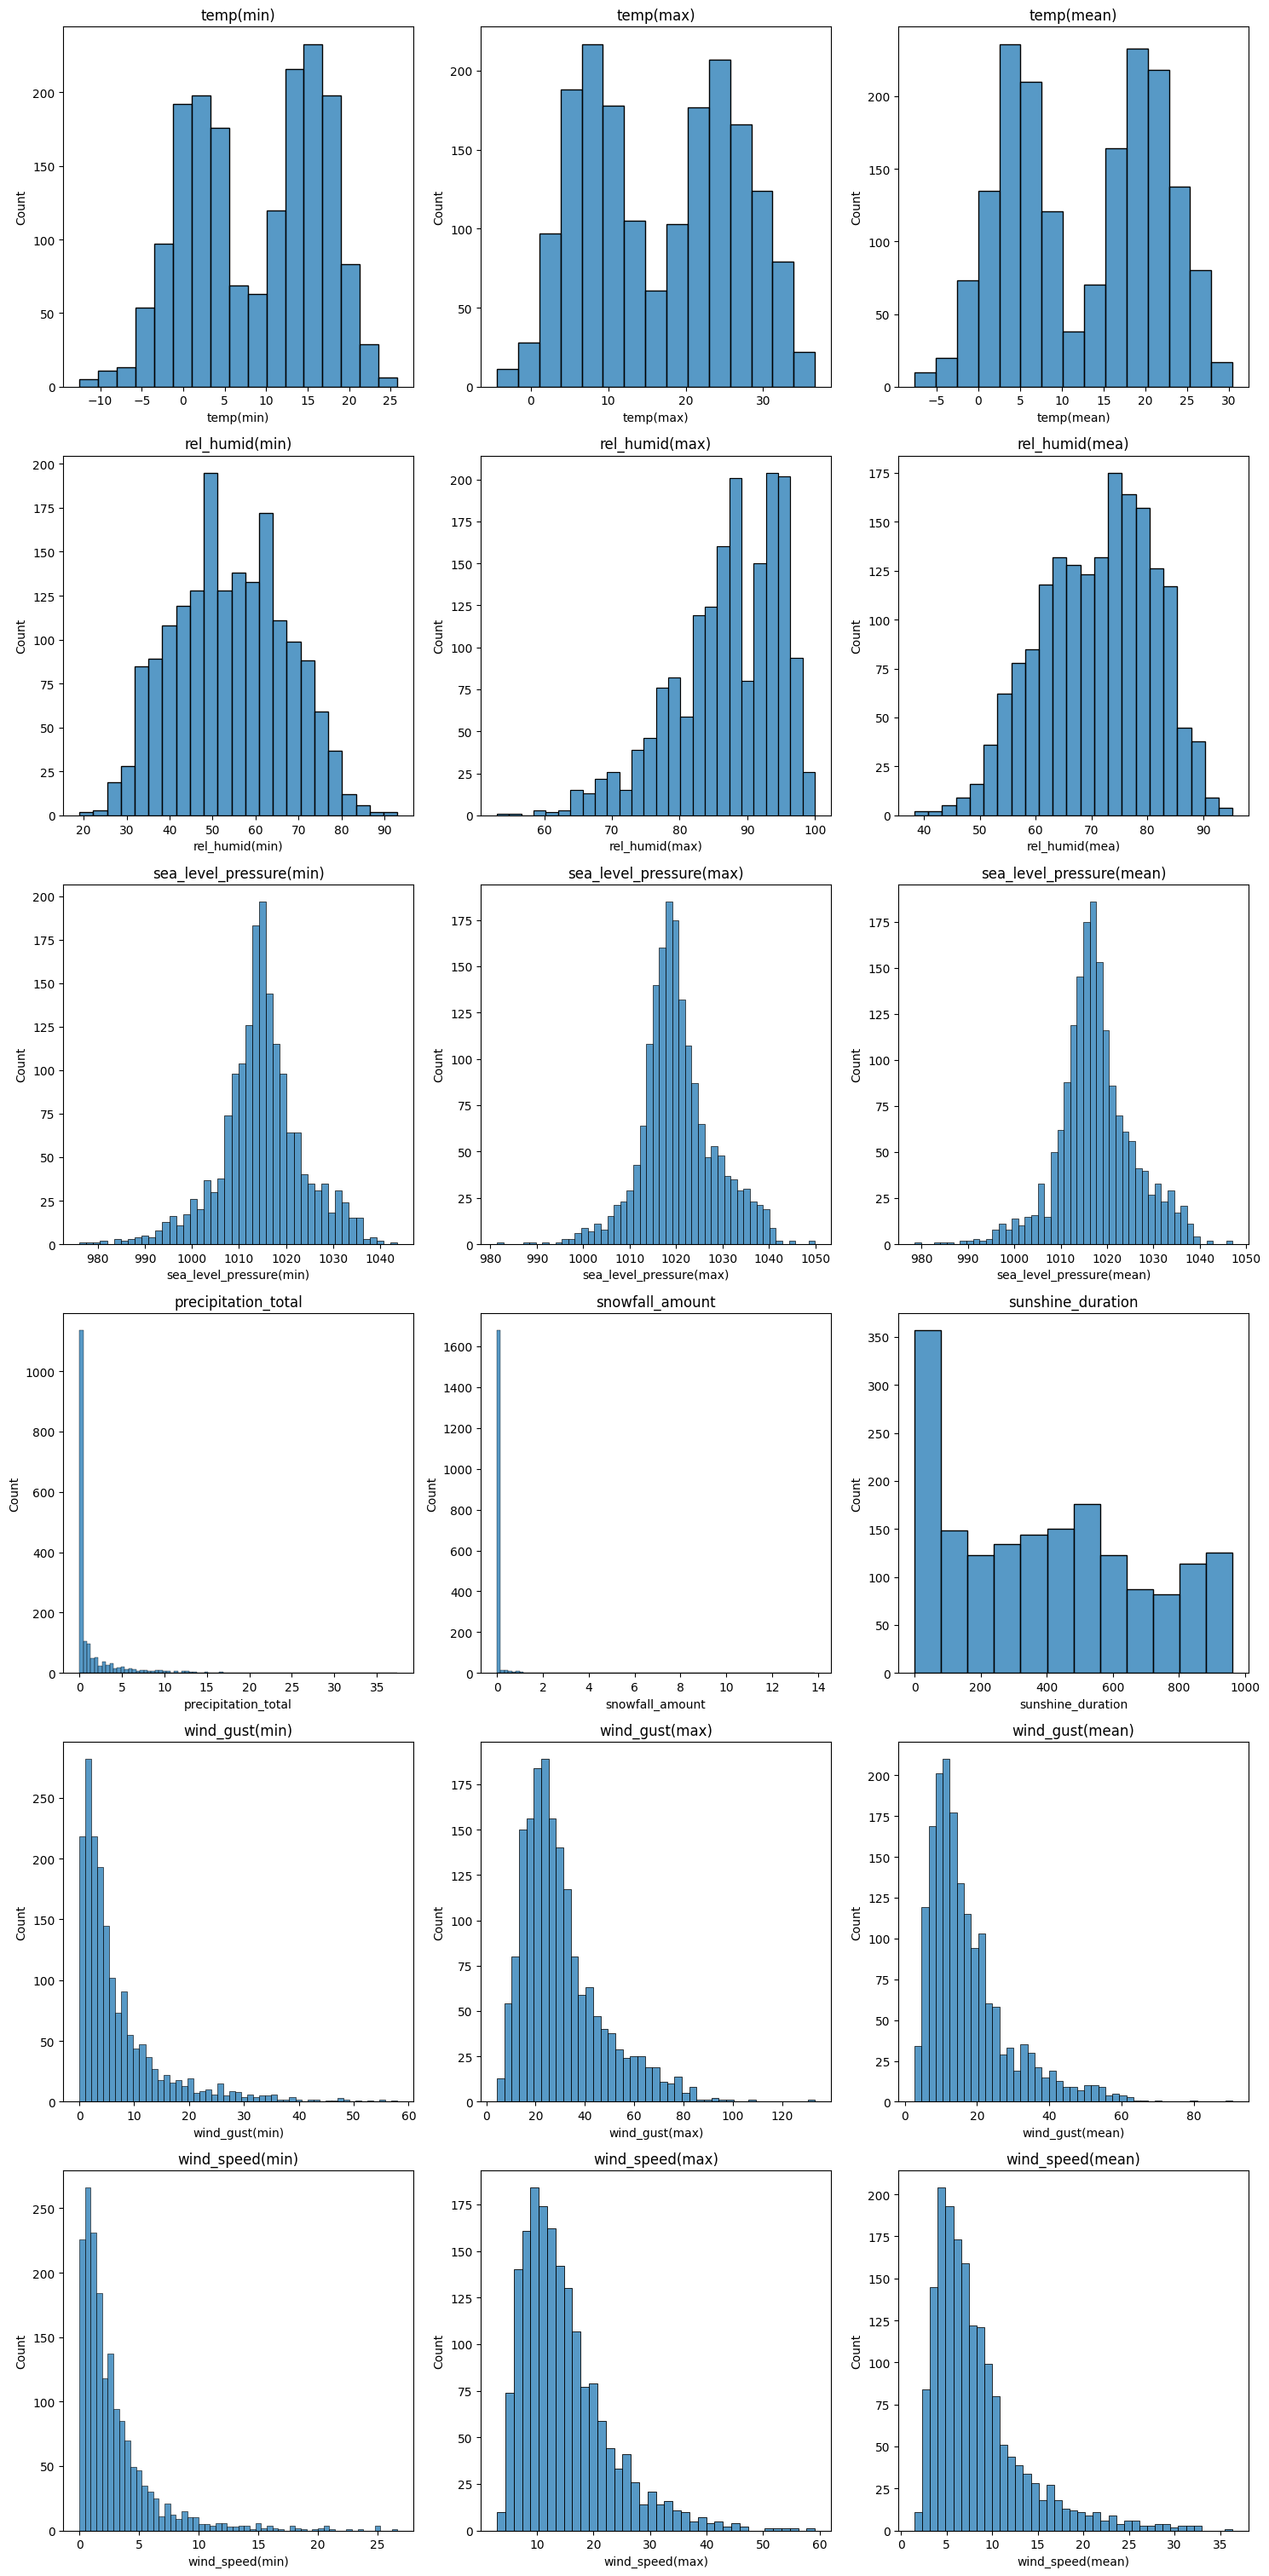

In [27]:
plt.figure(figsize=(5*3, 5*9))   # width x height

rows = 9
cols = 3

for i, col in enumerate(df.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.histplot(x=df[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()


First we look for any outliers

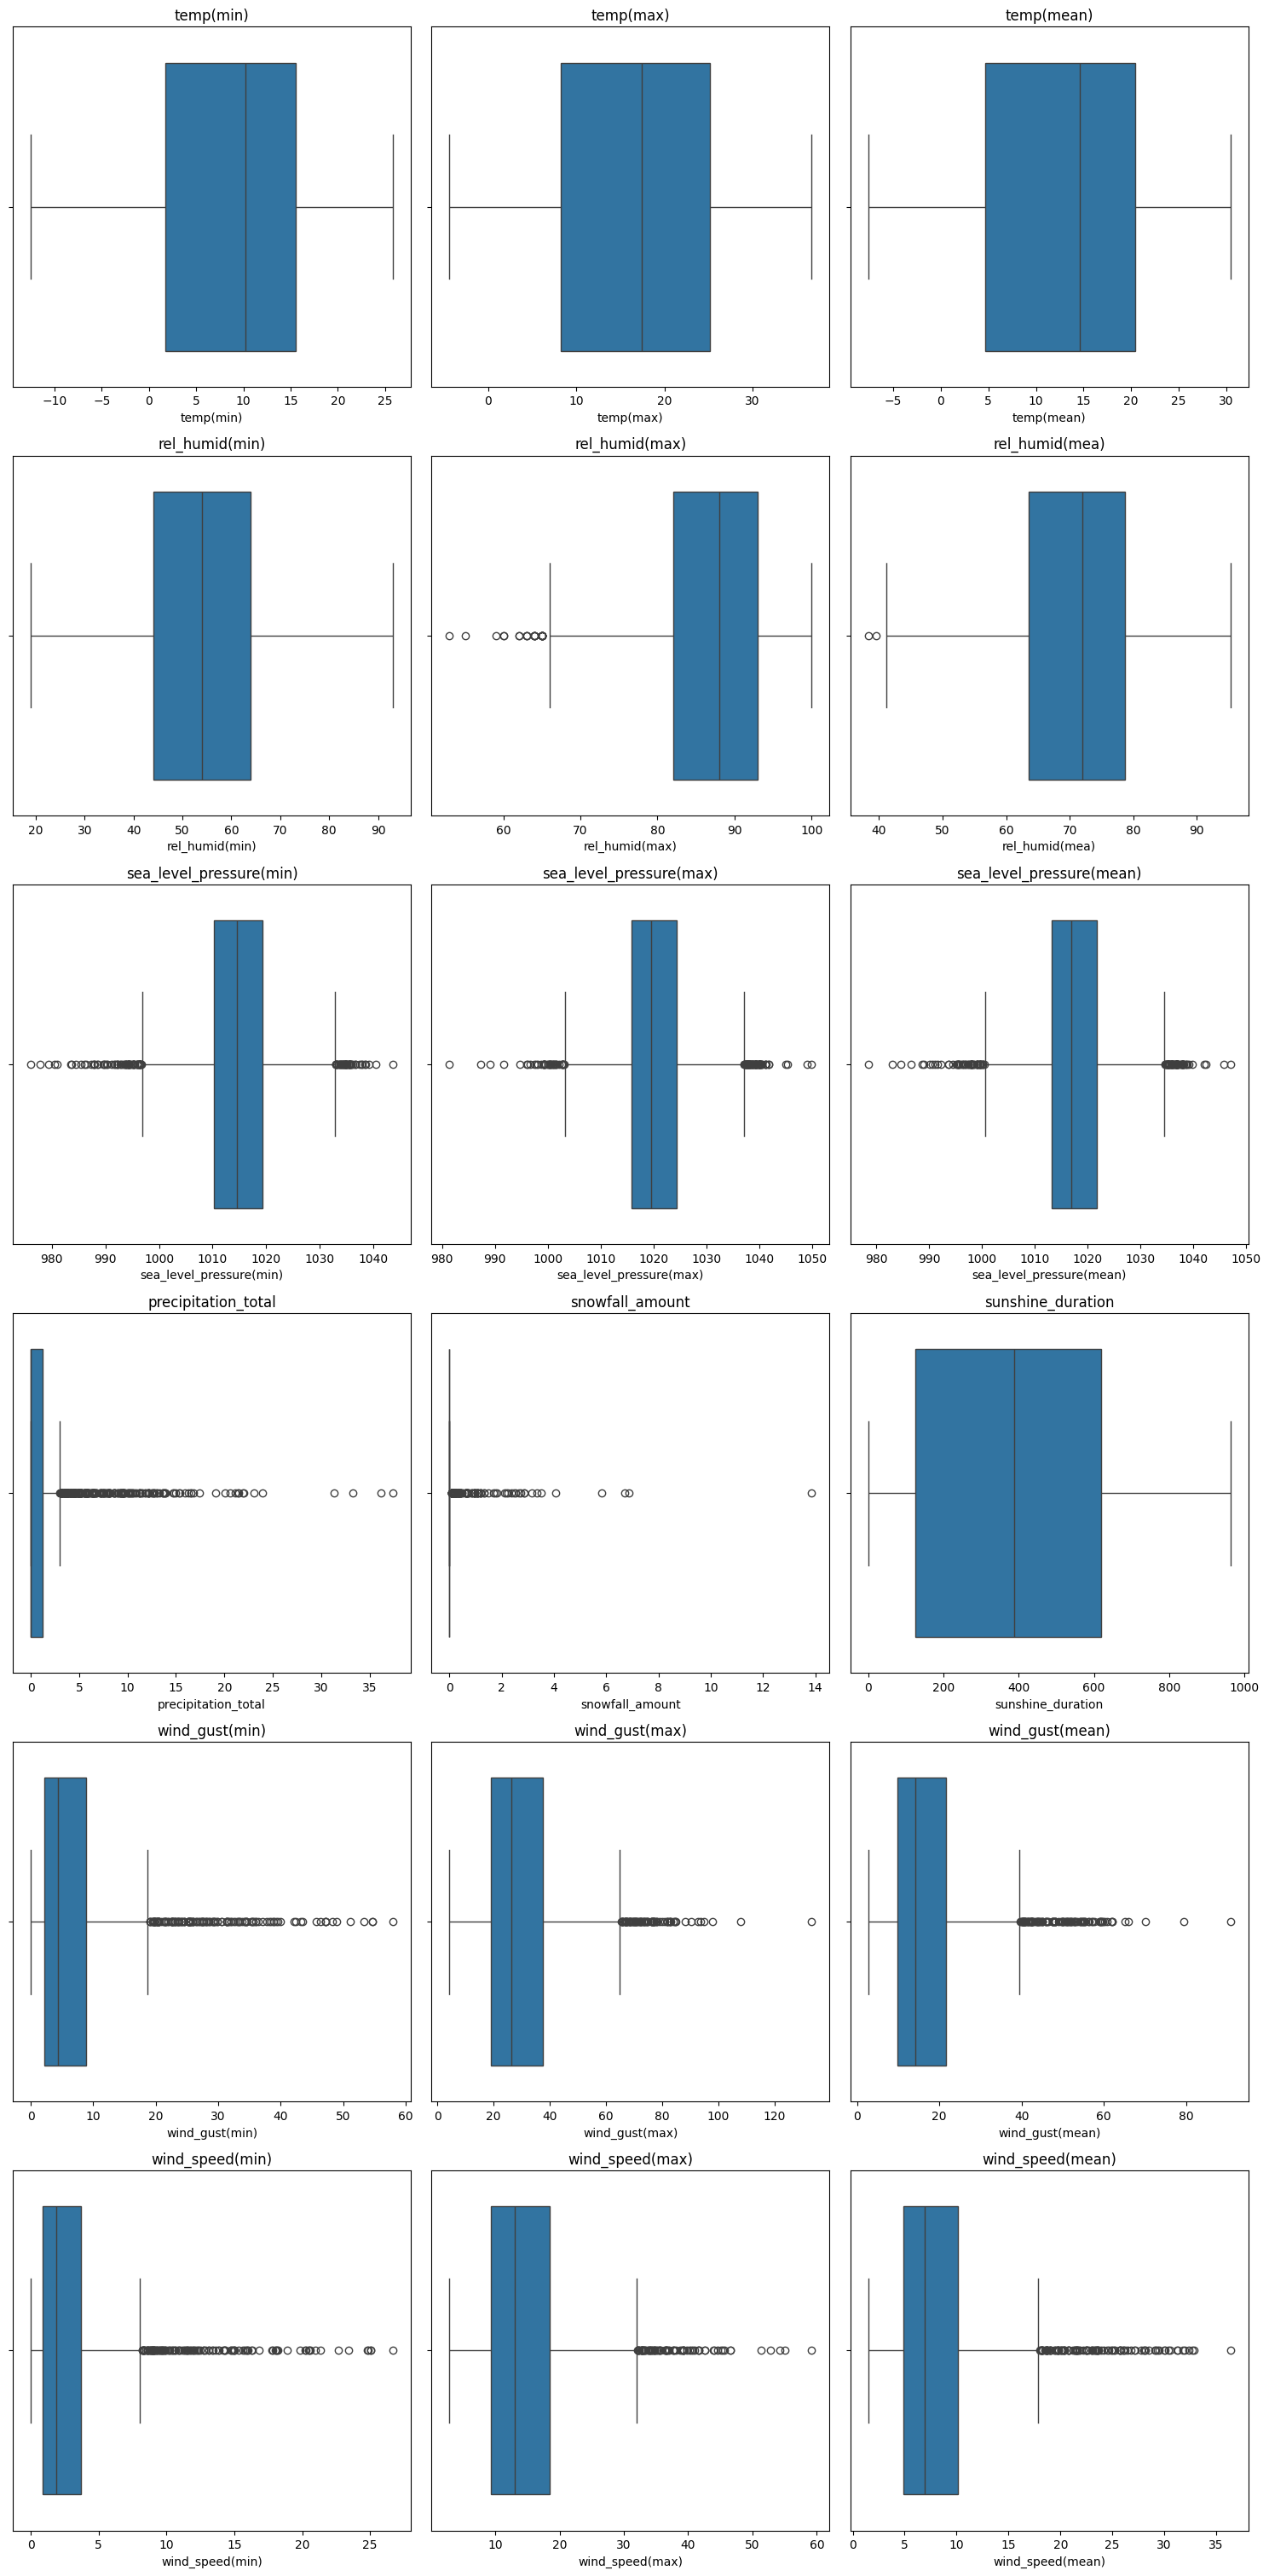

In [28]:
#Box Plots for outliers
plt.figure(figsize=(5*3, 5*9)) 

for i, col in enumerate(df.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

Counts of outliers in the dataset

In [29]:
outlier_counts = {}
outlier_percentage ={}

for col in df.columns:
    # Drop non-numeric columns automatically
    if not pd.api.types.is_numeric_dtype(df[col]):
        continue
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_counts[col] = outliers.count()
    outlier_percentage[col] = len(outliers) / len(df[col]) * 100

In [30]:
print("Outlier Count")
print(outlier_counts)

Outlier Count
{'temp(min)': np.int64(0), 'temp(max)': np.int64(0), 'temp(mean)': np.int64(0), 'rel_humid(min)': np.int64(0), 'rel_humid(max)': np.int64(25), 'rel_humid(mea)': np.int64(2), 'sea_level_pressure(min)': np.int64(109), 'sea_level_pressure(max)': np.int64(97), 'sea_level_pressure(mean)': np.int64(109), 'precipitation_total': np.int64(270), 'snowfall_amount': np.int64(111), 'sunshine_duration': np.int64(0), 'wind_gust(min)': np.int64(150), 'wind_gust(max)': np.int64(87), 'wind_gust(mean)': np.int64(108), 'wind_speed(min)': np.int64(122), 'wind_speed(max)': np.int64(76), 'wind_speed(mean)': np.int64(108)}


In [31]:
print("Outlier percentage")
print(outlier_percentage)

Outlier percentage
{'temp(min)': 0.0, 'temp(max)': 0.0, 'temp(mean)': 0.0, 'rel_humid(min)': 0.0, 'rel_humid(max)': 1.4180374361883155, 'rel_humid(mea)': 0.11344299489506524, 'sea_level_pressure(min)': 6.1826432217810545, 'sea_level_pressure(max)': 5.501985252410663, 'sea_level_pressure(mean)': 6.1826432217810545, 'precipitation_total': 15.314804310833807, 'snowfall_amount': 6.2960862166761205, 'sunshine_duration': 0.0, 'wind_gust(min)': 8.508224617129892, 'wind_gust(max)': 4.934770277935337, 'wind_gust(mean)': 6.125921724333523, 'wind_speed(min)': 6.920022688598978, 'wind_speed(max)': 4.310833806012479, 'wind_speed(mean)': 6.125921724333523}


Get all columns with outliers

In [32]:
#get column names with outliers
outlier_col = [key for key,value in outlier_counts.items() if value >0]
outlier_col

['rel_humid(max)',
 'rel_humid(mea)',
 'sea_level_pressure(min)',
 'sea_level_pressure(max)',
 'sea_level_pressure(mean)',
 'precipitation_total',
 'snowfall_amount',
 'wind_gust(min)',
 'wind_gust(max)',
 'wind_gust(mean)',
 'wind_speed(min)',
 'wind_speed(max)',
 'wind_speed(mean)']

<h2> Handling Outliers </h2>
we will try different methods of handling outliers and see how it affects our clustering

Method 1: Capping Outliers with the Max and Min Value

In [33]:
df_capped = df.copy()

for col in outlier_col:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_capped.loc[df_capped[col] > upper, col] = upper
    df_capped.loc[df_capped[col] < lower, col] = lower


C:\Users\OMNI BOOK\AppData\Local\Temp\ipykernel_13596\1832201128.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '109.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper, col] = upper


Checking Distribution again

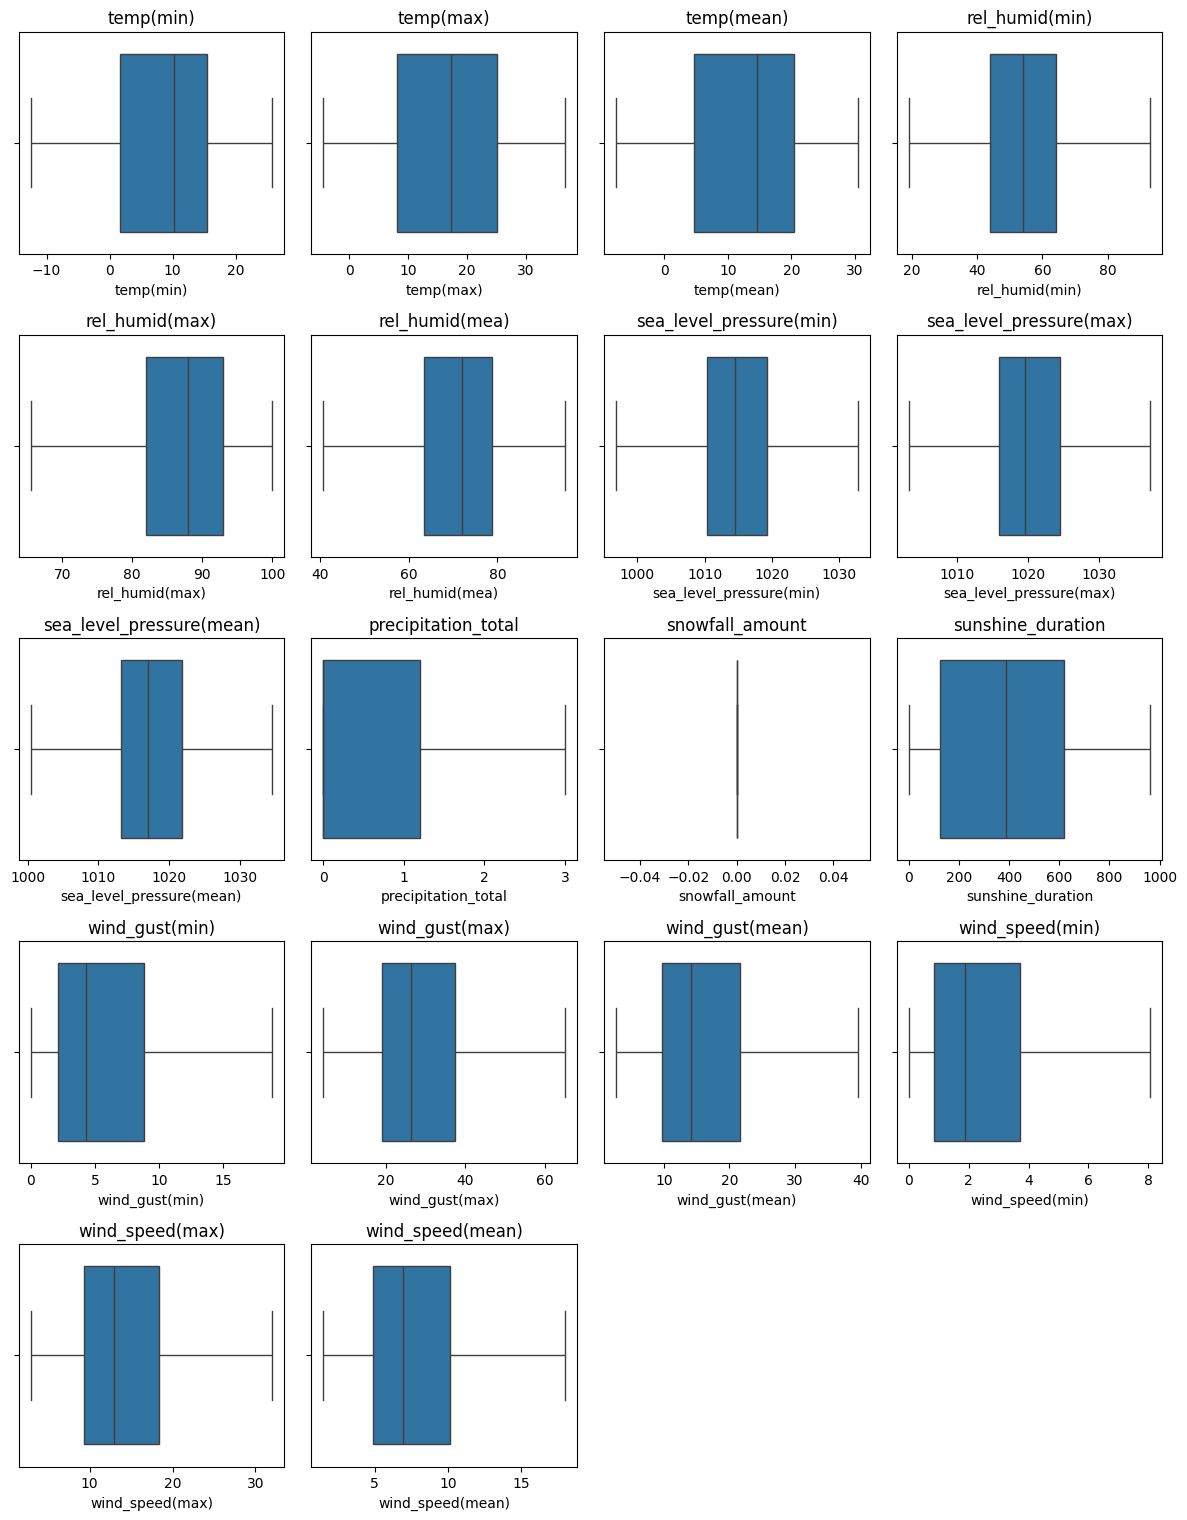

In [34]:
#Box Plots for outliers
plt.figure(figsize=(3*4, 3*9)) 

rows = 9
cols = 4

for i, col in enumerate(df_capped.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_capped[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

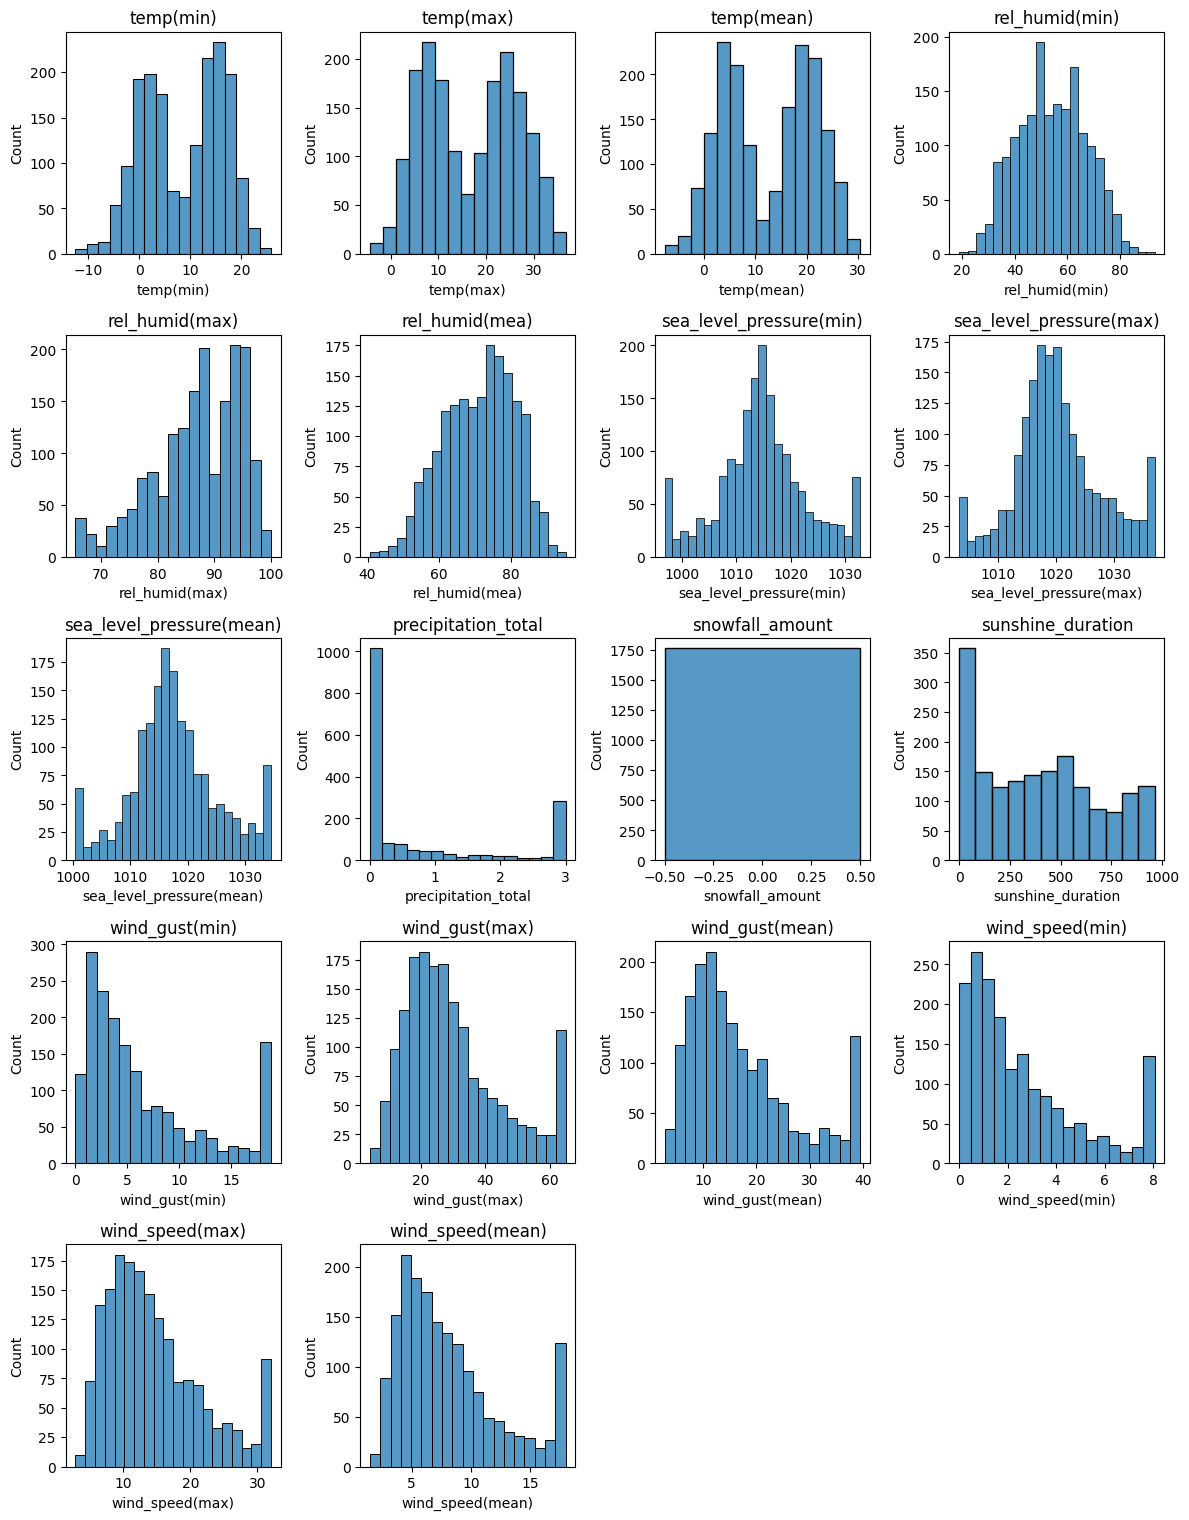

In [35]:
#Histogram Plots for outliers
plt.figure(figsize=(3*4, 3*9)) 

rows = 9
cols = 4

for i, col in enumerate(df_capped.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.histplot(x=df_capped[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

<h3>Standardization to make the data into a standard distribution 

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scaler.fit(df_capped)
print(scaler.mean_)
df_capped_scaled=scaler.transform(df_capped)

[8.73877619e+00 1.67792982e+01 1.27173499e+01 5.40924560e+01
 8.70428247e+01 7.10425057e+01 1.01481526e+03 1.02038108e+03
 1.01763518e+03 7.62847423e-01 0.00000000e+00 3.99168240e+02
 6.35268282e+00 2.99338054e+01 1.69427761e+01 2.58992598e+00
 1.45912957e+01 8.08550437e+00]


In [38]:
df_capped_scaled = pd.DataFrame(df_capped_scaled, columns=df_capped.columns)

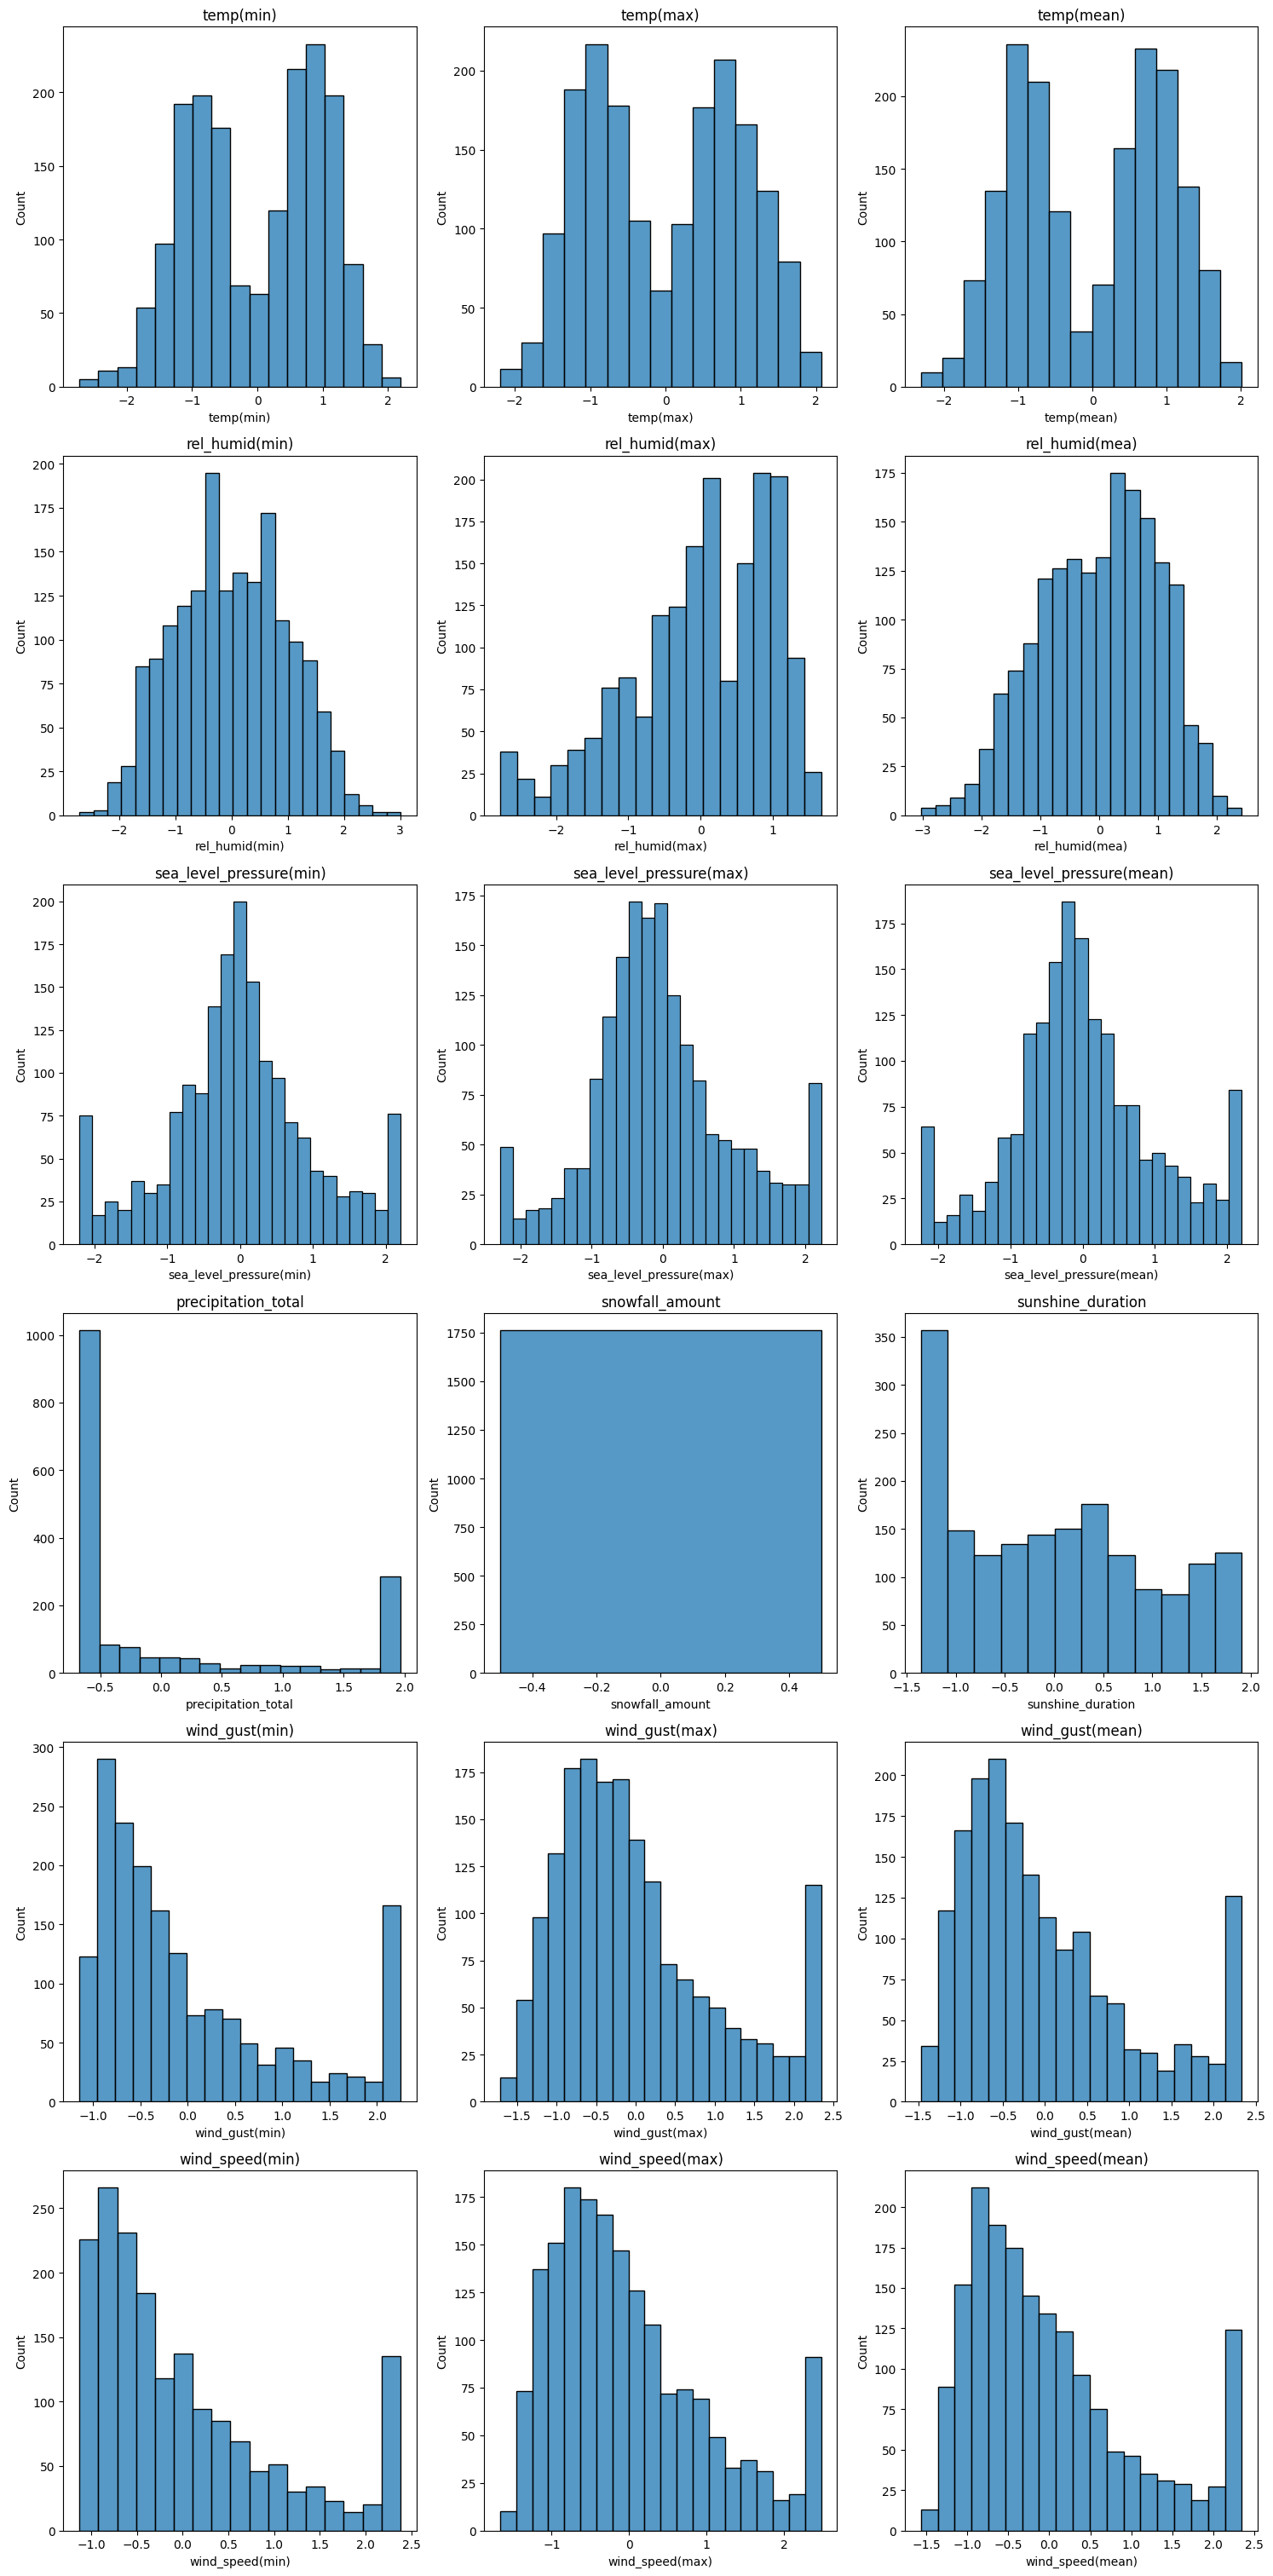

In [39]:
#Box Plots again to see values
plt.figure(figsize=(5*3, 5*9)) 

rows = 9
cols = 3

for i, col in enumerate(df_scaled.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.histplot(x=df_scaled[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

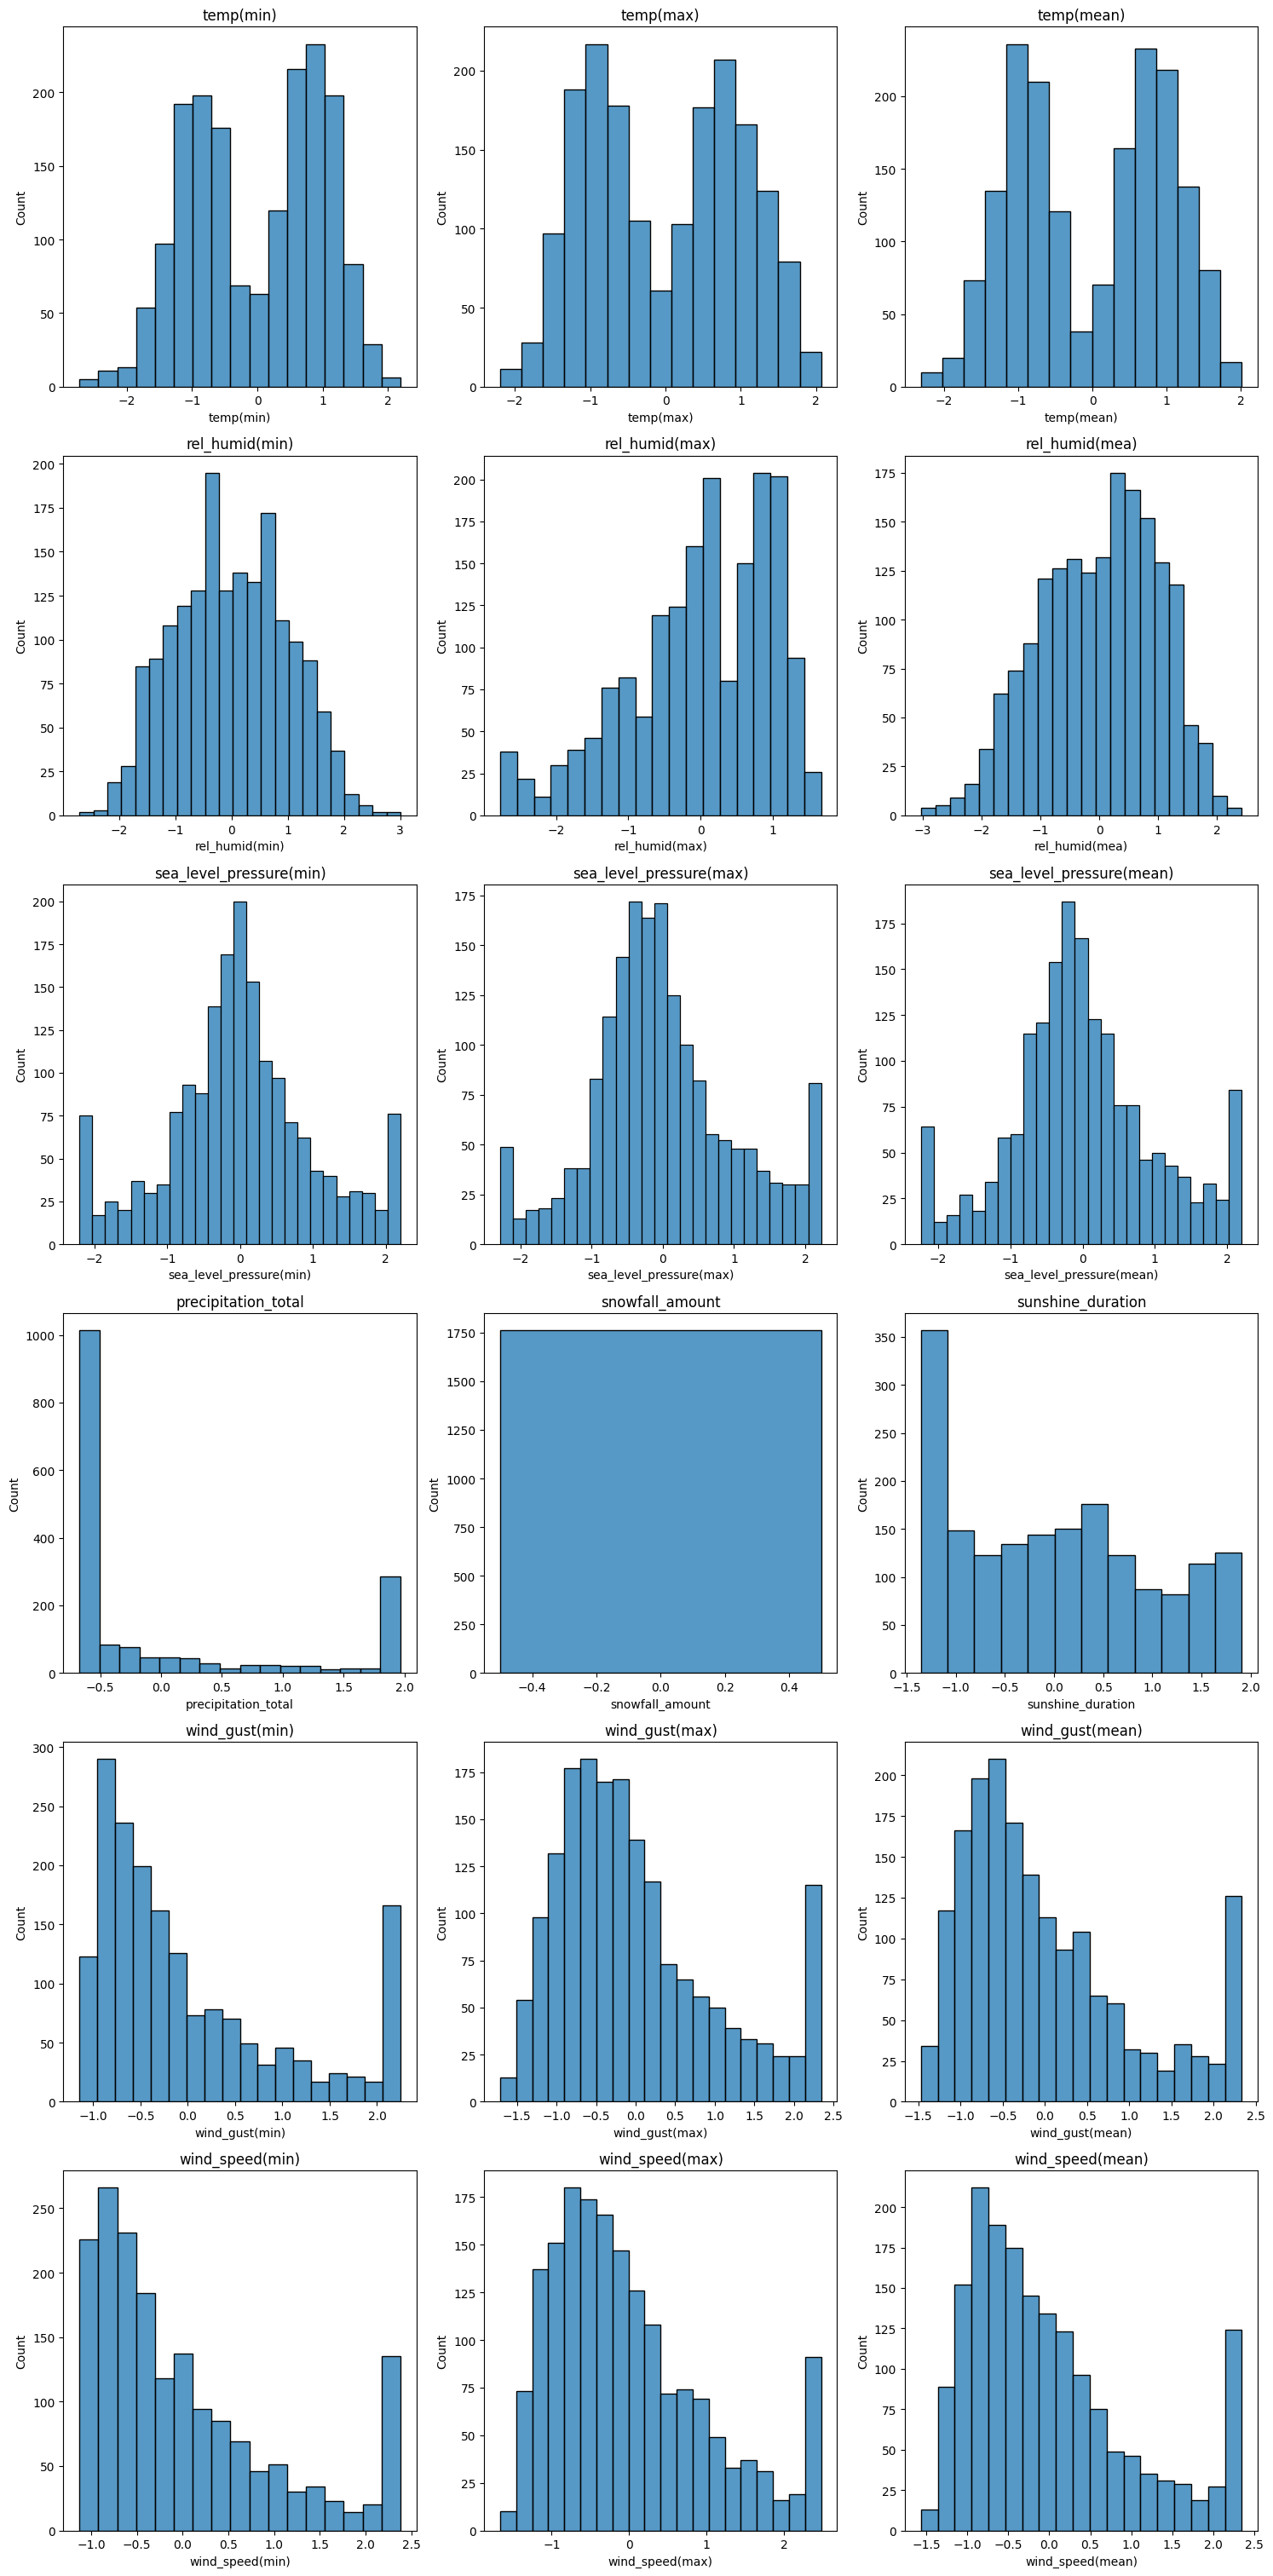

In [41]:
#Box Plots for outliers
plt.figure(figsize=(5*3, 5*9)) 

rows = 9
cols = 3

for i, col in enumerate(df_capped_scaled.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.histplot(x=df_capped_scaled[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

## Checking DF values again

In [42]:
df_capped_scaled.head()

,temp(min),temp(max),temp(mean),rel_humid(min),rel_humid(max),rel_humid(mea),sea_level_pressure(min),sea_level_pressure(max),sea_level_pressure(mean),precipitation_total,snowfall_amount,sunshine_duration,wind_gust(min),wind_gust(max),wind_gust(mean),wind_speed(min),wind_speed(max),wind_speed(mean)
0,-0.081811,0.082035,0.082831,0.533560,1.152916,0.683039,-0.210050,-0.262740,-0.244458,-0.494774,0.0,-0.165001,-0.561433,-0.436521,-0.489154,-0.349466,-0.595250,-0.343850
1,0.304013,0.177421,0.258536,0.379073,0.895488,0.541416,-0.112082,-0.501463,-0.344305,0.999620,0.0,-0.379982,0.022964,-0.316264,-0.213197,0.683983,0.240770,0.126315
2,0.202750,0.144243,0.176446,1.305990,1.152916,1.253697,0.059361,-0.382101,-0.162513,-0.582680,0.0,-0.926423,-0.561433,-0.388418,-0.431792,-0.244227,-0.469240,-0.407483
3,0.219414,0.850306,0.522638,-0.007142,0.638059,0.658047,0.132837,-0.222952,-0.048541,-0.670585,0.0,1.636511,-0.756232,-0.652984,-0.771312,-0.779461,-0.441778,-0.807496
4,0.462957,0.915625,0.815431,-0.547843,0.123202,-0.445780,0.108345,0.042296,0.071420,-0.670585,0.0,1.875224,-1.015964,-0.941602,-1.175945,-0.963346,-1.158073,-1.135622


In [43]:
df_capped_scaled.describe()

,temp(min),temp(max),temp(mean),rel_humid(min),rel_humid(max),rel_humid(mea),sea_level_pressure(min),sea_level_pressure(max),sea_level_pressure(mean),precipitation_total,snowfall_amount,sunshine_duration,wind_gust(min),wind_gust(max),wind_gust(mean),wind_speed(min),wind_speed(max),wind_speed(mean)
count,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.0,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03
mean,-2.418183e-17,-1.612122e-16,9.672732e-17,-1.128485e-16,-2.418183e-16,6.690306e-16,-7.343215e-15,-1.310252e-14,-7.101397e-15,-8.060610e-18,0.0,5.642427e-17,4.836366e-17,3.546668e-16,1.813637e-17,-1.188940e-16,-3.828790e-17,1.450910e-16
std,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,0.0,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00
min,-2.724897e+00,-2.194785e+00,-2.315664e+00,-2.710647e+00,-2.772869e+00,-3.035606e+00,-2.206148e+00,-2.285259e+00,-2.239239e+00,-6.705852e-01,0.0,-1.355054e+00,-1.145830e+00,-1.711249e+00,-1.470506e+00,-1.127335e+00,-1.664315e+00,-1.567636e+00
25%,-9.021675e-01,-8.894495e-01,-9.137280e-01,-7.795717e-01,-6.490836e-01,-7.519354e-01,-5.529383e-01,-5.943003e-01,-5.733177e-01,-6.705852e-01,0.0,-9.342067e-01,-7.562317e-01,-7.251387e-01,-7.418561e-01,-7.606441e-01,-7.513524e-01,-7.643615e-01
50%,1.886503e-01,6.440951e-02,2.163763e-01,-7.141583e-03,1.232021e-01,9.571993e-02,-2.636050e-02,-1.168530e-01,-8.871668e-02,-6.705852e-01,0.0,-3.877407e-02,-3.666338e-01,-2.441094e-01,-2.891630e-01,-3.156305e-01,-2.278502e-01,-2.725928e-01
75%,8.705716e-01,8.720791e-01,8.781015e-01,7.652886e-01,7.667735e-01,7.705119e-01,5.492013e-01,5.330058e-01,5.372964e-01,3.842813e-01,0.0,7.467938e-01,4.450285e-01,5.014860e-01,4.883219e-01,4.960736e-01,5.411870e-01,4.811510e-01
max,2.189551e+00,2.065439e+00,2.015438e+00,3.005336e+00,1.667774e+00,2.420003e+00,2.202411e+00,2.223965e+00,2.203218e+00,1.966581e+00,0.0,1.911604e+00,2.246919e+00,2.341423e+00,2.333589e+00,2.381150e+00,2.479996e+00,2.349420e+00


In [44]:
df_capped_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp(min)                 1763 non-null   float64
 1   temp(max)                 1763 non-null   float64
 2   temp(mean)                1763 non-null   float64
 3   rel_humid(min)            1763 non-null   float64
 4   rel_humid(max)            1763 non-null   float64
 5   rel_humid(mea)            1763 non-null   float64
 6   sea_level_pressure(min)   1763 non-null   float64
 7   sea_level_pressure(max)   1763 non-null   float64
 8   sea_level_pressure(mean)  1763 non-null   float64
 9   precipitation_total       1763 non-null   float64
 10  snowfall_amount           1763 non-null   float64
 11  sunshine_duration         1763 non-null   float64
 12  wind_gust(min)            1763 non-null   float64
 13  wind_gust(max)            1763 non-null   float64
 14  wind_gus

<h3>Applying Clustering Algos</h3>
<ul>
  <li><b>K - means Clustering</b></li>
</ul>


Step 1. Finding Number of K

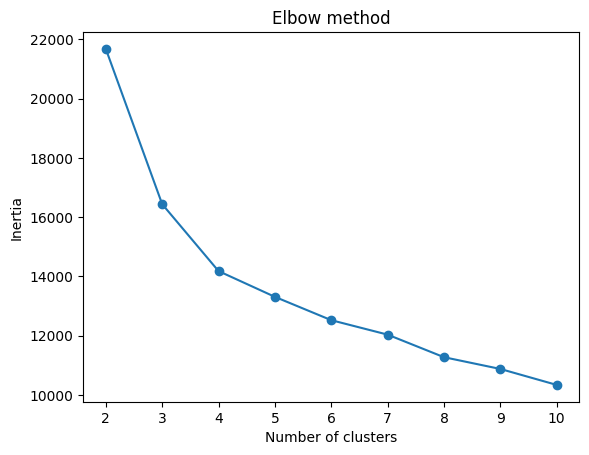

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_score =[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_capped_scaled)
    score = silhouette_score(df_capped_scaled,kmeans.labels_)
    inertias.append(kmeans.inertia_)
    sil_score.append(score)    

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

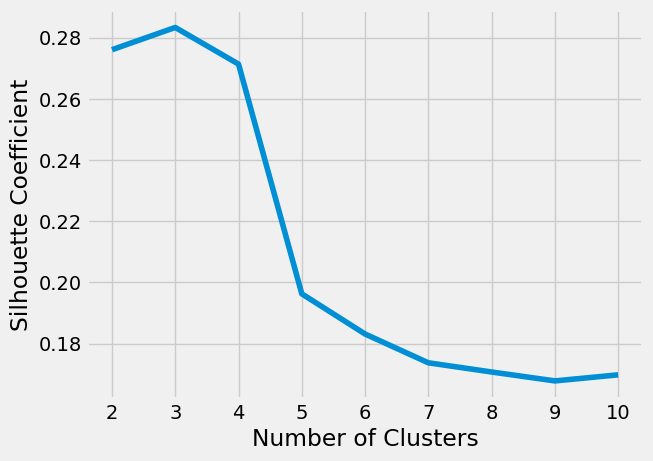

In [58]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sil_score)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [55]:
from kneed import KneeLocator

In [56]:
kl = KneeLocator(range(2, 11), inertias , curve="convex", direction="decreasing")
kl.elbow

np.int64(4)

4 seems like the optimal number of clusters

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_capped_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [ ]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)

14177.883478516895
[[-6.87615451e-01 -7.88672249e-01 -7.40698760e-01  4.63634272e-01
  -1.06451249e-01  3.16046756e-01 -7.03714467e-01 -2.98618027e-01
  -5.17070295e-01  4.42885037e-01  0.00000000e+00 -7.45350323e-01
   1.65659827e+00  1.58882314e+00  1.80634571e+00  1.60049062e+00
   1.65215638e+00  1.79975491e+00]
 [-1.04089421e+00 -9.82865492e-01 -1.03346807e+00  4.23295124e-01
   3.98489798e-01  5.11479783e-01  1.16600152e+00  1.23289704e+00
   1.22878866e+00 -5.17409748e-01  0.00000000e+00 -2.05490595e-01
  -3.83638129e-01 -3.76903539e-01 -4.14219485e-01 -2.85388705e-01
  -3.90514179e-01 -3.90200897e-01]
 [ 8.94497385e-01  1.00570755e+00  9.74997062e-01 -7.90178248e-01
  -5.31991989e-01 -8.37728339e-01  1.71390657e-03 -1.99475937e-01
  -9.19338710e-02 -4.19857557e-01  0.00000000e+00  8.91511404e-01
  -4.18386362e-01 -5.39403944e-01 -5.37725392e-01 -4.70583113e-01
  -5.21041414e-01 -5.49141919e-01]
 [ 3.18991150e-02 -1.37025175e-01 -7.04942610e-02  5.58739238e-01
   5.57297352e-01 